<div style="padding: 0.5em; background-color: #1876d1; color: #fff;">

### **[Part 2] Computational Drug Discovery - Exploratory Data Analysis**

</div>
In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

Note :
* Target enzyme: Aromatase responsible for breast cancer
* Objective: find compound that inhibit Aromatase function

---
<b># Bioinformatics Project </b>

## **Install conda and rdkit**

In [ ]:
#! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
#! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Load bioactivity data**

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('data/03-bioactivity_data_curated.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [14]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [15]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [16]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [17]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2592,292.338,3.17100,0.0,4.0
2593,278.311,2.86800,1.0,4.0
2594,292.338,3.17100,0.0,4.0
2595,278.311,2.86800,1.0,4.0


In [18]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0,active
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0,active
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8,active
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0,intermediate


Now, let's combine the 2 DataFrame

In [19]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [20]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0,active,292.338,3.17100,0.0,4.0
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0,active,278.311,2.86800,1.0,4.0
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8,active,292.338,3.17100,0.0,4.0
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0,intermediate,278.311,2.86800,1.0,4.0


Let's visualize the distribution of the actual IC50 Values

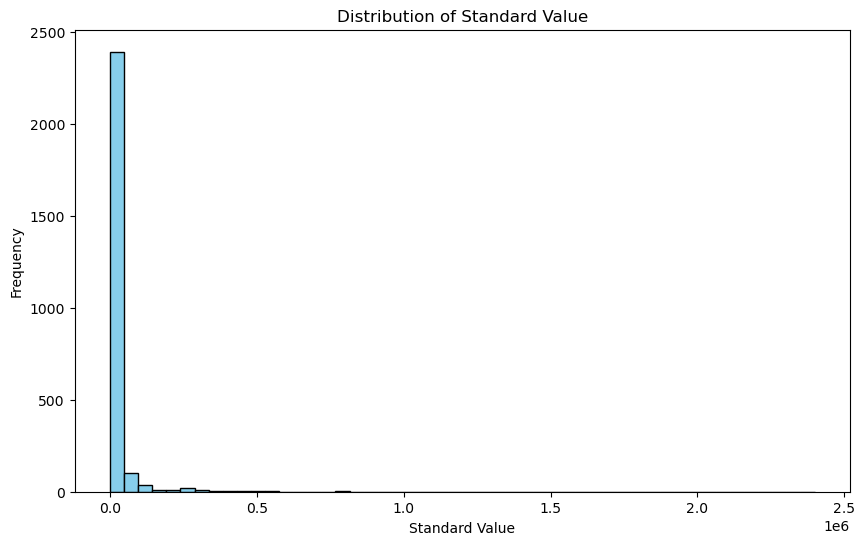

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_combined['standard_value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Standard Value')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.show()

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [50]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar + 1e-10))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [51]:
df_combined.standard_value.describe()

count    2.597000e+03
mean     1.801579e+04
std      8.002271e+04
min      0.000000e+00
25%      1.600000e+02
50%      1.320000e+03
75%      8.900000e+03
max      2.398833e+06
Name: standard_value, dtype: float64

In [52]:
-np.log10( (10**-9)* 100000000 )

1.0

In [53]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [54]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [55]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,13.0
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,13.0
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,active,292.338,3.17100,0.0,4.0,237.8
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,intermediate,278.311,2.86800,1.0,4.0,1100.0


In [56]:
df_norm.standard_value_norm.describe()

count    2.597000e+03
mean     1.801579e+04
std      8.002271e+04
min      0.000000e+00
25%      1.600000e+02
50%      1.320000e+03
75%      8.900000e+03
max      2.398833e+06
Name: standard_value_norm, dtype: float64

In [57]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148736
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301029
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623241
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.243364
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.266803
...,...,...,...,...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,7.882729
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,7.882729
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,active,292.338,3.17100,0.0,4.0,6.623606
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,intermediate,278.311,2.86800,1.0,4.0,5.958568


In [58]:
df_final.pIC50.describe()

count    2597.000000
mean        6.001098
std         1.269688
min         2.620000
25%         5.050605
50%         5.879393
75%         6.795609
max        10.000000
Name: pIC50, dtype: float64

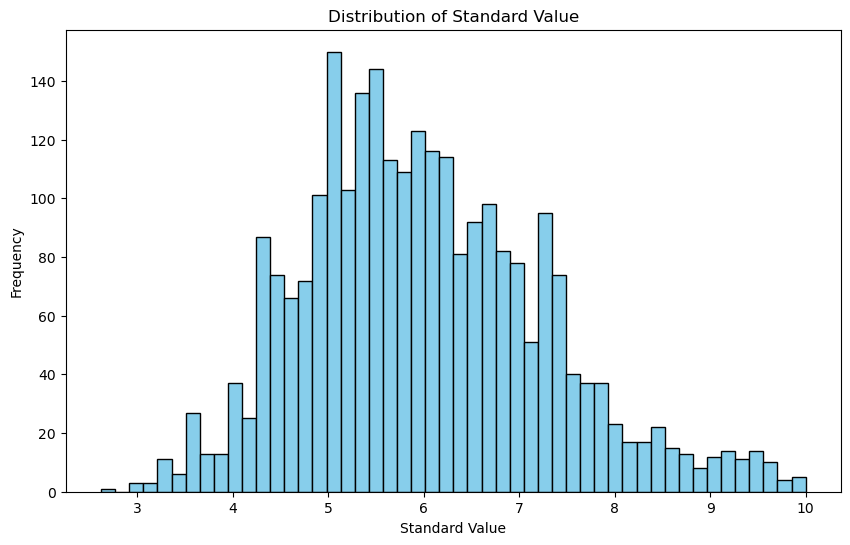

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_final['pIC50'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Standard Value')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.show()

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [70]:
df_final.rename(columns={'class': 'bioactivity_class'}, inplace=True)

In [71]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301029
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623241
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.243364
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.266803
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.386158
...,...,...,...,...,...,...,...,...
2590,CHEMBL5274084,CCCCCOc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,348.446,4.73140,0.0,4.0,7.375718
2591,CHEMBL5284760,CCCOc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,320.392,3.95120,0.0,4.0,8.677781
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,7.882729
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,7.882729


In [107]:
df_2class.to_csv("data/04-bioactivity-2class-data.csv")
df_final.to_csv("data/04-bioactivity-3class-data.csv")

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [72]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

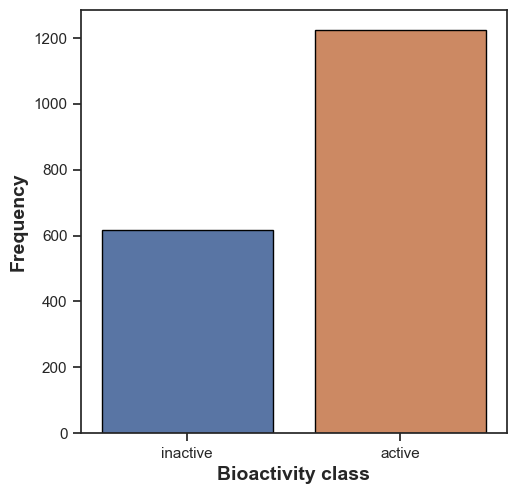

In [81]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', hue='bioactivity_class', legend=False)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('materials/plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

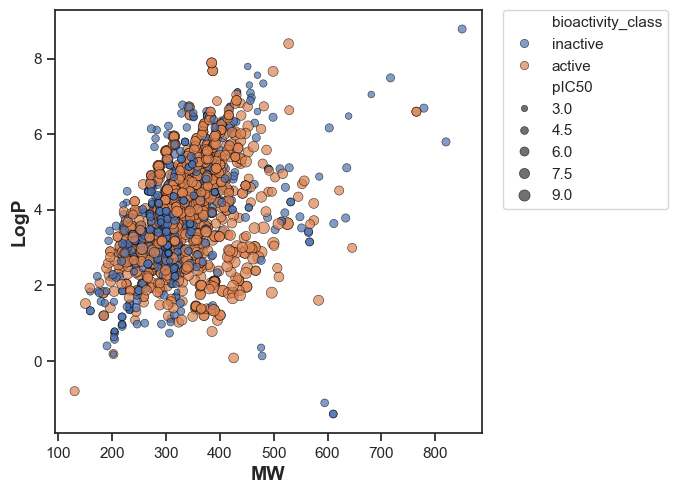

In [83]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('materials/plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

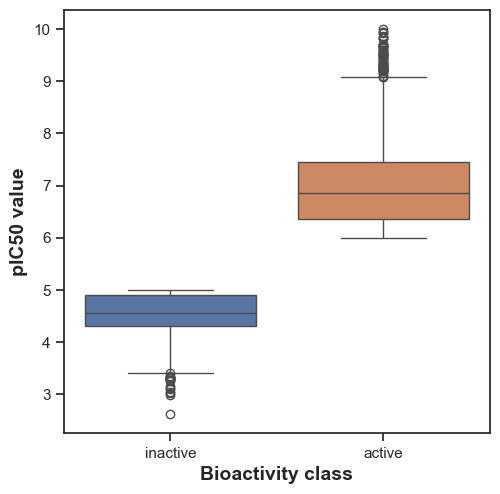

In [86]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class, hue='bioactivity_class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('materials/plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric test used to determine whether there is a significant difference between the distributions of two independent samples. It is often used when the assumptions of the parametric tests (like the t-test) are not met, particularly the assumption of normality.

In [95]:
def mannwhitney(descriptor, verbose=False):
    # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    # seed the random number generator
    seed(1)
    
    # actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]
    
    # compare samples
    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'materials/mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    
    return results

In [96]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,753984.0,3.414262e-269,0.05,Different distribution (reject H0)


#### **MW**

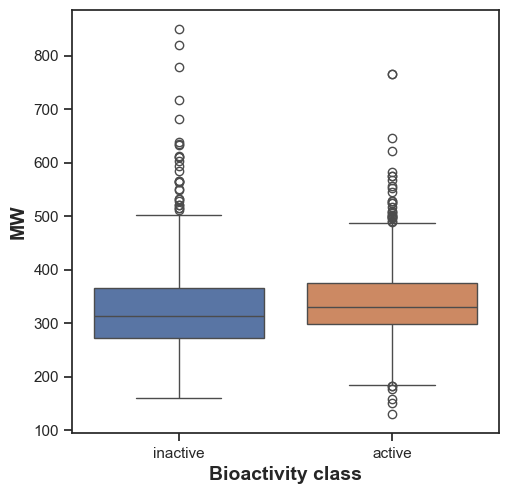

In [98]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='MW', data=df_2class, hue='bioactivity_class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.savefig('materials/plot_MW.pdf')

In [99]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,432537.0,2.411444e-07,0.05,Different distribution (reject H0)


#### **LogP**

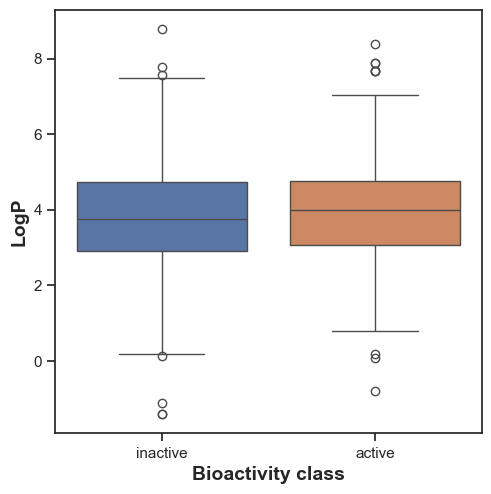

In [100]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class, hue='bioactivity_class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('materials/plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [101]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,400255.0,0.030548,0.05,Different distribution (reject H0)


#### **NumHDonors**

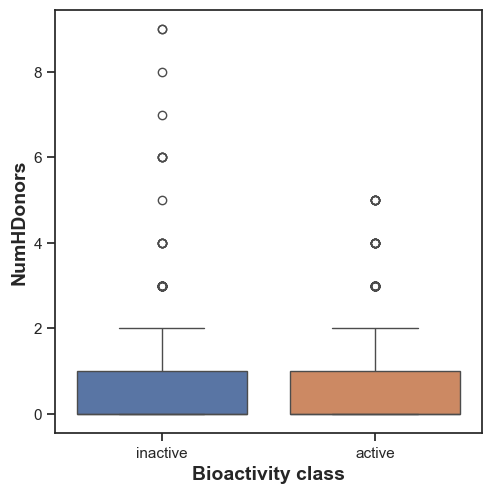

In [102]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df_2class, hue='bioactivity_class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('materials/plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [103]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,331709.0,0.000002,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

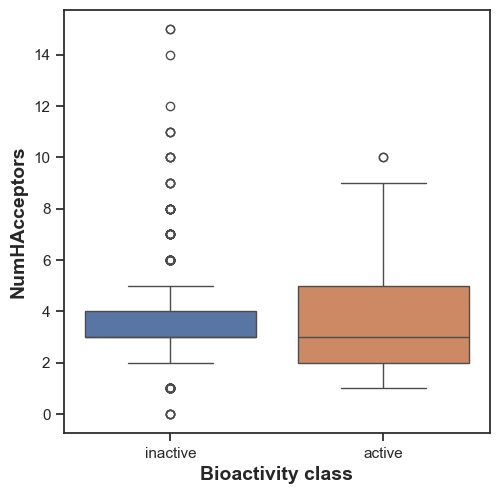

In [104]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class, hue='bioactivity_class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('materials/plot_NumHAcceptors.pdf')

In [105]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,399133.0,0.035866,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) all of them show ***statistically significant difference*** between **actives** and **inactives**.

---

In [40]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: bioactivity_data_preprocessed.csv (deflated 80%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
